<a href="https://colab.research.google.com/github/yexf308/AppliedStatistics/blob/main/3_Maximum_likelihood_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\mr#1{\mathrm{#1}}$
## 1. MLE for the multivariate Gaussian
Given samples $\{\m{x}^{(i)}\}_{i=1}^N\subset \mathbb{R}^D$ indepndently drawn from **unknown** Gaussian $\mathcal{N}(\mm\mu, \Sigma)$, how to approximate $\mm\mu$ and $\Sigma$?

- The probability for generating $\mathbf{x}^{(i)}$ given the parameters: 
$$ \c{N}(\mathbf{x}^{(i)}|\mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^D|\Sigma|}}\exp\left(-\frac{1}{2}(\mathbf{x}^{(i)}-\mm\mu)^\top\Sigma^{-1}(\mathbf{x}^{(i)}-\mm\mu)\right)$$

- The NLL is 
\begin{align}
l_N(\mm\mu, \Sigma) &= -\sum_{i=1}^N \log(\c{N}(\mathbf{x}^{(i)}|\mm\mu, \Sigma))  \\
&=\frac{Nd}{2}\log(2\pi)-\frac{N}{2}\log(|\Lambda|)+\frac{1}{2}\sum_{i=1}^N \left((\mathbf{x}^{(i)}-\mm\mu)^\top \Lambda(\mathbf{x}^{(i)}-\mm\mu)\right)
\end{align}
where $\Lambda = \Sigma^{-1}$ is the **precision matrix** (inverse covariance matrix).






---


 Using the fact that 
  - The trace is invariant under cyclic permutations of matrix products:
$$ \textrm{tr}(ABC) =\textrm{tr}(CAB) =\textrm{tr}(BCA)  $$

  - Since $\mathbf{x}^\top A \mathbf{x}$ is a scalar, we can take its trace and obtain the same value:
$$\mathbf{x}^\top A \mathbf{x} =\textrm{tr}(\mathbf{x}^\top A \mathbf{x})=\textrm{tr}(\mathbf{x}^\top  \mathbf{x}A) $$

  - $\frac{\partial}{\partial A}\textrm{tr}(AB)=\frac{\partial}{\partial A}\textrm{tr}(BA)=B^\top$

  - $\frac{\partial}{\partial A}\log|A| = A^{-\top} $

  - The determinant of the inverse of an invertible matrix is the inverse of the determinant, $|A|=\frac{1}{|A^{-1}|}$  


---



Analytically solve it by setting 
$$\frac{\partial l_N(\mm\mu,\Sigma)}{\partial \mm\mu} =0,\qquad \frac{\partial l_N(\mm\mu, \Sigma)}{\partial \Lambda}=0 $$

- Using the fact that 
$ \frac{\partial w^\top \Lambda w}{\partial w}=2\Lambda w$,
\begin{align}
\frac{\partial l_N(\mu,\Sigma)}{\partial \mu} =\sum_{i=1}^N \Sigma^{-1}(\mathbf{x}^{(i)}-\mu)=0
\end{align}
Since $\Sigma$ is PD,
the MLE is $\boxed{\hat{\mm\mu}=\frac{1}{N}\sum_{i=1}^N \mathbf{x}^{(i)}}$ which is the empirical mean. 

- Use the trace trick
\begin{align}
l_N(\hat{\mm\mu}, \Sigma) &=\frac{Nd}{2}\log(2\pi)-\frac{N}{2}\log(|\Lambda|)+\frac{1}{2}\sum_{i=1}^N \textrm{tr}\left((\mathbf{x}^{(i)}-\hat{\mm\mu})(\mathbf{x}^{(i)}-\hat{\mm\mu})^\top\Lambda\right) \\
&=\frac{Nd}{2}\log(2\pi)-\frac{N}{2}\log(|\Lambda|)+\frac{1}{2}\textrm{tr}\left(\m{S}_{\bar{\m{x}}}\Lambda\right)
\end{align}
Here define $\m{S}_{\bar{\m{x}}} =\sum_{i=1}^N(\mathbf{x}^{(i)}-\hat{\mm\mu})(\mathbf{x}^{(i)}-\hat{\mm\mu})^\top = \left(\sum_{i=1}^N\mathbf{x}^{(i)} (\mathbf{x}^{(i)})^\top\right) - N\hat{\mm\mu}\hat{\mm\mu}^\top$, where $\m{S}_{\bar{\m{x}}}$ is the **scatter matrix** centered on $\hat{\mm\mu}$. 




---



**Note:** We can rewrite the scatter matrix in a more compact form as follows: 
\begin{align}
\m{S}_{\bar{\m{x}}} = \tilde{\m{X}}^\top \tilde{\m{X}} = \m{X}^\top C_N^\top C_N \m{X} =\m{X}^\top C_N \m{X} 
\end{align}
where
\begin{align}
C_N = \m{I}_N -\frac{1}{N}\mb{1}_N\mb{1}_N^\top
\end{align}
is the centering matrix, which converts $\m{X}$ to $\tilde{\m{X}}$ by subtracting the mean off every row. 

---


Since $\Lambda$ is symmetric matrix, 
$$ \frac{\partial l_N(\hat{\mu},\Sigma)}{\partial \Lambda} = -\frac{N}{2}\Sigma +\frac{1}{2}\m{S}_{\bar{\m{x}}} $$
Then the MLE is 
$$ \boxed{\hat{\Sigma}= \frac{1}{N}\sum_{i=1}^N (\mathbf{x}^{(i)}-\hat\mu) (\mathbf{x}^{(i)}-\hat\mu)^\top}$$

**Issues:**
- MLE of covariance matrix is slightly biased since the unbiased one uses $\frac{1}{N-1}$. 

- MLE may overfit or be numerically unstable, especially when the number
of samples $N$ is small compared to the number of dimensions $D$. The main problem is that $\Sigma$ has $O(D^2)$ parameters, so we may need a lot of data to reliably estimate it. Particularly, when $N< D$,  $\m{S}_{\bar{\m{x}}}$ is singular matrix so is the MLE. 




In [ ]:
def multivariate_normal(x, D, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**D * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [ ]:
# Plot bivariate distribution
def generate_surface(mean, covariance, D):
    """Helper function to generate density surface."""
    nb_of_x = 50 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.array([x1[i,j], x2[i,j]]), 
                D, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

In [ ]:
# correlated normals
mu    = np.array([0.,1.])
sigma = np.array([[1.,0.8],[0.8,1.]])
D     = 2

x1, x2, p = generate_surface(
    mu, sigma, D)

In [ ]:

# Create A
A = np.linalg.cholesky(sigma)
print(A)
# Sample X from standard normal
n = 5000  # Samples to draw
X = np.random.normal(size=(D, n))
# Apply the transformation
Y = ((A.dot(X)).T + mu).T

[[1.  0. ]
 [0.8 0.6]]


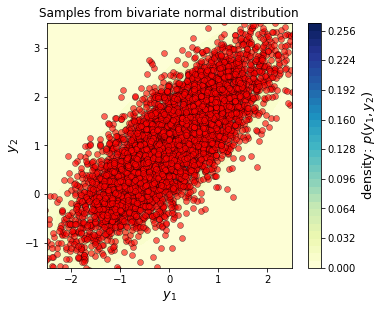

In [ ]:
# Plot the samples and the distribution
fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution
x1, x2, p = generate_surface(mu, sigma, D)
con = ax.contourf(x1, x2, p, 33, cmap=cm.YlGnBu)
# Plot samples
ax.plot(Y[0,:], Y[1,:], 'ro', alpha=.6,
        markeredgecolor='k', markeredgewidth=0.5)
ax.set_xlabel('$y_1$', fontsize=13)
ax.set_ylabel('$y_2$', fontsize=13)
ax.axis([-2.5, 2.5, -1.5, 3.5])
ax.set_aspect('equal')
ax.set_title('Samples from bivariate normal distribution')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('density: $p(y_1, y_2)$', fontsize=13)
plt.show()
#

In [ ]:
print('the MLE of mu is\n', Y.mean(1))
print('the MLE of Sigma is \n', cov(Y))
relative_error1 = norm(Y.mean(1) -mu)/norm(mu)
relative_error2 = norm(cov(Y)-sigma, 2)/norm(sigma,2)
print(relative_error1)
print(relative_error2)

the MLE of mu is
 [0.00731539 1.01807932]
the MLE of Sigma is 
 [[1.00778248 0.80884675]
 [0.80884675 1.01616167]]
0.019503243707237106
0.01208929322024393


## 2. First try on regularization
A fundamental problem with MLE, is **Overfitting**: pick parameters that minimize loss on the training set, but this may not result in a model that has low loss on future data.

- Examples on tossing a coin. E.g., $N=3$ and observe 3 heads. 

- the model has enough parameters to perfectly fit the observed
training data.

- But empirical distribution is not true distribution. 

- the model may not **generalize** to testing dataset.

<img src="https://github.com/yexf308/MAT592/blob/main/image/generalise.png?raw=true" width="400" />

**Solution:** regularization, add a pentalty term to NLL, 
\begin{align}
\c{L}(\mm\theta,\lambda)= \frac{1}{N}\sum_{n=1}^N \ell(y^{(n)},\mm\theta; \m{x}^{(n)}) +\lambda C(\mm\theta).
\end{align}
where $\lambda$ is regularization parameter and $C(\mm\theta)$ is complexity penalty.

Usually choose $C(\mm\theta) = -\log p(\mm \theta)$, where $p(\mm \theta)$ is prior for $\mm\theta$. For NLL, it becomes
\begin{align}
\c{L}(\mm\theta, \lambda)&= -\frac{1}{N}\sum_{n=1}^N \log p(y^{(n)}| \m{x}^{(n)}, \mm\theta) -\lambda \log p(\mm \theta)  
\end{align}
If we scale $p(\mm\theta)$ correctly, 
\begin{align}
\c{L}(\mm\theta, \lambda) \propto -\left[\sum_{n=1}^N \log p(y^{(n)}| \m{x}^{(n)}, \mm\theta) + \log p(\mm \theta) \right]=-\left[\log p(\c{D}|\mm\theta)+\log p(\mm\theta)\right]
\end{align}
Minimize $\c{L}(\mm\theta, \lambda)$ is the same as maximize log posterior. 

This is **maximum a posterior estimation.**

### MAP estimation for the multivariate Gaussian
MLE for the covariance is the empirical covariance, $\hat{\Sigma}=\frac{1}{N}\m{S}_{\bar{\m{x}}}$. In high dimensions, $\hat\Sigma$ can easily become singular. 
\begin{align}
\hat{\Sigma}_{\text{map}} = \lambda \Sigma_0 + (1-\lambda) \hat\Sigma.
\end{align}
where $\Sigma_0$ is the diagonal part of $\hat\Sigma$ and $\lambda$ controls the amount of regularization. 

\begin{align}
\hat{\Sigma}_{\text{map}}(i,j) = \begin{cases} \hat{\Sigma}(i,j) & \text{if } i=j \\ (1-\lambda)\hat{\Sigma}(i,j) & \text{Otherwise} \end{cases} 
\end{align}
- Without regulation, $\lambda=0, \hat{\Sigma}_{\text{map}} =  \hat{\Sigma}$.
- With full regulation, $\lambda=1, \hat{\Sigma}_{\text{map}} = \Sigma_0$.  

It is called **shrinkage estimation**. 
To choose the amount of regularization $\lambda$, we can use the holding out or cross validation. 

### MAP estimation for the Bernoulli distribution
If we observe just five head, the MLE is $\mm\theta =1$. To avoid
this, we can add a penalty to $\mm\theta$ to discourage the extreme value, such as $\mm\theta =1$ or $0$. We can do
this by using a beta distribution as our prior $p(\mm\theta)=\text{Beta}(\mm\theta|a,b)$, where $a,b>1 $ encourages values
of $\mm\theta$ near to $a/(a+b)$. 

\begin{align}
\text{Beta}(\mm\theta|a,b) = \text{const}\cdot\mm\theta^{a-1} \cdot (1-\mm\theta)^{b-1}
\end{align}

The log likelihood plus log prior becomes
\begin{align}
\c{L}(\mm\theta)&= \log p(\c{D}|\mm\theta) + \log p(\mm\theta) \\
&= N_1\log\mm\theta +N_0 \log (1-\mm\theta) + (a-1)\log\mm\theta +(b-1)\log (1-\mm\theta)
\end{align}
The MAP estimate is
\begin{align}
\hat{\mm\theta}_{\text{map}} =\frac{N_1 +a -1 }{N_1+N_2+a+b-2}
\end{align}

If we choose $a=b=2$, it begins 
\begin{align}
\hat{\mm\theta}_{\text{map}} = \frac{N_1+1}{N_1+N_2+2}
\end{align}

This is called **add-one smoothing**, and is a simple but widely used technique to avoid the zero
count problem.


## 3. Def of Maximum Likelihood Estimation

The process of estimating $\mm\theta$ from $\c{D}$ is called **model fitting**, or **training**. Dataset $\c{D}=\{\m{x}^{(n)}, y^{(n)}\}_{n=1}^N$ with $\m{x}^{(n)}$ as input data and $y^{(n)}$ as output data (supervised setting). Or dataset $\c{D}=\{\m{x}^{(n)}\}$ (unconditional setting). 

\begin{align}
\hat{\mm\theta}=\arg\min_{\mm\theta} \c{L}(\mm\theta)
\end{align}
where $\c{L}(\mm\theta)$  is some kind of loss function or objective function.

- We solve this optimization problem analytically or numerically. 

- Quantify the uncertainty about the parameter $\mm{\theta}$. 

The most common approach is to pick the parameters that assign the highest probability to the training data, that is **Maximum Likelihood Estimation**. 
$$ \hat{\mm\theta}_{\mr{MLE}}= \arg\max_{\mm\theta} p(\c{D}|\mm\theta)$$

- With the i.i.d assumption, 
$$p(\c{D}|\mm\theta)=\Pi_{n=1}^Np(y^{(n)}|\m{x}^{(n)},\theta) \quad\text{ or } \quad\Pi_{n=1}^Np(\m{x}^{(n)}|\theta)$$

- We usually work with the negative log likelihood, then 
$$l_N(\mm{\theta})=-\sum_{n=1}^N \log p(y^{(n)}|\m{x}^{(n)},\theta) \quad\text{ or } \quad -\sum_{n=1}^N \log p(\m{x}^{(n)}|\theta)$$

- Then $l_N(\mm\theta)$ is the loss function. It becomes minimization problem, 
$$ \hat{\mm\theta}_{\mr{MLE}}= \arg\min_{\mm\theta} l_N(\mm\theta)$$

-  We may want to maximize the joint likelihood of inputs and outputs data usually in generative classifiers. 
$$ \hat{\mm\theta}_{\mr{MLE}}= -\sum_{n=1}^N \log p(y^{(n)}, \m{x}^{(n)}|\theta)  $$


## 4. Justification for MLE
The MLE is that the resulting predictive distribution $q(\m{x})\triangleq p(\m{x}| \theta)$ is as close as possible (in a sense to be defined below) to the **empirical distribution** of the data!!

- In the **unconditional case**, the empirical distribution is defined by 
$$p_{\c{D}}(\m{x}) ≜\frac{1}{N}\sum_{n=1}^N\delta(\m{x}-\m{x}^{(n)})  $$

One way to measure the (dis)similarity between probability distributions $p$ and $q$ is **Kullback Leibler divergence**. 
\begin{align}
D_{KL}(p||q)&= \sum_{\m{x}}p(\m{x})\log \frac{p(\m{x})}{q(\m{x})} \\
&=-\mb{H}(p) +\mb{H}(p,q)
\end{align}
where $\mb{H}(p)$ is the entropy of $p$ and $\mb{H}(p,q)$ is the cross-entropy of $p$ and $q$. One can show $D_{KL}(p||q)\ge 0$ and $D_{KL}(p||q)= 0$ iff $p=q$. 

If we define $q(\m{x}) =p(\m{x}|\theta)$ and $p(\m{x})=p_{\c{D}}(\m{x})$, then the KL divergence becomes 
\begin{align}
D_{KL}(p||q)&=\sum_{\m{x}} p_{\c{D}}(\m{x}) \log p_{\c{D}}(\m{x})- p_{\c{D}}(\m{x})\log p(\m{x}|\theta) \\
&=-\mb{H}(p_{\c{D}}) - \frac{1}{N} \sum_{n=1}^N\log(\m{x}^{(n)}|\theta) = \text{const} + \text{NLL}(\theta).
\end{align}

Minimizing the KL is equivalent to minimizing the NLL which is equivalent to computing the MLE!

- In the **supervised (conditional)** setting, 
$$p_\c{D}(\m{x}, y) = p_{\c{D}}(y|\m{x})p_\c{D}(\m{x}) = \frac{1}{N}\sum_{n=1}^N \delta(\m{x}-\m{x}^{(n)}) \delta(y-y^{(n)}) $$

The expected KL then becomes
\begin{align}
\mb{E}_{p_\c{D}(\m{x})}[D_{KL}(p_{\c{D}}(y|\m{x}) || q(y|\m{x}))] &= \sum_{\m{x}}p_\c{D}(\m{x})\left[ \sum_y p_{\c{D}}(y|\m{x}) \log \frac{p_{\c{D}}(y|\m{x})}{q(y|\m{x})}\right] \\
&= \text{const} -\sum_{\m{x},y} p_{\c{D}}(y, \m{x})\log q(y|\m{x}) \\
&=\text{const} - \frac{1}{N}\sum_{n=1}^N \log p(y^{(n)}| \m{x}^{(n)},\theta)
\end{align}

Minimizing this is equivalent to minimizing the conditional NLL. 







## 5. Empirical risk minimization (ERM)
Generalize MLE by replacing the log loss term in the supervised learning(classification), $\ell(y^{(n)},\mm\theta; \m{x}^{(n)}) = -\log p(y^{(n)}|\m{x}^{(n)},\mm\theta)$, with any other loss function, to get
\begin{align}
\c{L}(\mm\theta)= \frac{1}{N}\sum_{n=1}^N \ell(y^{(n)},\mm\theta; \m{x}^{(n)})
\end{align}
This is known as **empirical risk minimization** or **ERM**. 
###  0-1 loss
\begin{align}
\ell_{01}(y^{(n)},\mm\theta; \m{x}^{(n)}) = \begin{cases} 0 & \text{if } y^{(n)} = f(\m{x}^{(n)};\mm\theta)  \\ 1 & \text{if } y^{(n)} \ne f(\m{x}^{(n)};\mm\theta) \end{cases}
\end{align}
where $f(\m{x}^{(n)};\theta)$ is some kind of predictor. The empirical risk becomes
\begin{align}
\c{L}(\mm\theta)= \frac{1}{N}\sum_{n=1}^N\ell_{01}(y^{(n)},\mm\theta; \m{x}^{(n)})
\end{align}
It is the empirical **misclassification rate** on the training set.

But it is a non-smooth step function but very hard to optimize. 

### Surrogate loss
Usually we can choose the loss function with a maximally tight convex upper bound, which is easier to minimize. 

Let $y\in \{+1, -1\}$ are the binary labels (in SVM). Denote $z= y\cdot f(\m{x},\theta)$ which is known for **margin**. 

- **log loss function**. The probaility distribution over labels are 
$$ p(y|\m{x},\mm\theta)= \sigma(z) = \frac{1}{1+\exp(-z)}$$
The Log loss is given by 
\begin{align}
\ell_{\text{log}} = -\log p(y|\m{x},\mm\theta) = \log(1+\exp(-z)).
\end{align}

- **hinge loss function**. 
\begin{align}
\ell_{\text{hinge}}=\max(0, 1-yf(\m{x},\theta)) = \max(0,1-z)=(1-z)_{+}
\end{align}

- **exponential loss**.
\begin{align}
\ell_{\text{exp}}= \exp(-y f(\m{x},\theta)) =\exp(-z)
\end{align}


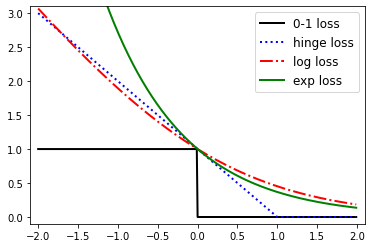

In [ ]:
zeroOne = np.vectorize(lambda x: 1 * (x <= 0))
hinge = np.vectorize(lambda x: max(0, 1 - x))
logLoss = np.vectorize(lambda x: np.log2(1 + np.exp(-x)))
expLoss = np.vectorize(lambda x: np.exp(-x))

funs = [zeroOne, hinge, logLoss, expLoss]
styles = ["k-", "b:", "r-.", "g-"]
labels = ["0-1 loss", "hinge loss", "log loss", "exp loss"]
x = np.arange(-2, 2, 0.01)

for i, fun in enumerate(funs):
    plt.plot(x, fun(x), styles[i], label=labels[i], linewidth=2)

plt.axis([-2.1, 2.1, -0.1, 3.1])
plt.legend(fontsize=12)
plt.show()

## 6. Online estimation
If the entire dataset $\c{D}$ is available before training starts, we say that we are doing **batch learning**. However, in some cases, the data set arrives sequentially, or the data is too large to load at once. So $\c{D}=\{\m{x}^{(1)},\m{x}^{(2)}, \dots \}$. in an unbounded stream. In this case, we want to perform **online learning**,i.e., you can calculate the MLE with only single pass of data. 

Let $\hat{\theta}_{t-1}$ be our MLE estimate given $\c{D}_{1:t-1}$. To ensure our learning algorithm takes constant time per update, 
\begin{align}
\theta_t = f(\hat{\theta}_{t-1},\m{x}^{(t)})
\end{align}

- MLE for the mean of a Gaussian: 
\begin{align}
 \hat{\mu}_t &= \frac{1}{t}((t-1)\hat{\mu}_{t-1}+\m{x}^{(t)})\\
 &=\hat{\mu}_{t-1}+\frac{1}{t}(\m{x}^{(t)} - \hat{\mu}_{t-1} )
 \end{align}
 It is called **moving average**. 

- MLE for the variance of a Gaussian:
For $t\ge 2$, 
\begin{align}
\boxed{t\sigma_t^2 }&= \sum_{i=1}^t\left(\m{x}^{(i)}- \hat{\mu}_t \right)^2  =\sum_{i=1}^t (\m{x}^{(i)})^2 - t\hat{\mu}_t^2\\
&= (t-1)\sigma_{t-1}^2 +\sum_{i=1}^t\left(\m{x}^{(i)}- \hat{\mu}_t \right)^2  -\sum_{i=1}^{t-1}\left(\m{x}^{(i)}- \hat{\mu}_{t-1} \right)^2   \\
&= (t-1)\sigma_{t-1}^2  + \left(\m{x}^{(t)}- \hat{\mu}_t \right)^2 +\sum_{i=1}^{t-1} (2\m{x}^{(i)}-\hat{\mu}_t -\hat{\mu}_{t-1})(\hat{\mu}_{t-1} - \hat{\mu}_t) \\
&=(t-1)\sigma_{t-1}^2  + \left(\m{x}^{(t)}- \hat{\mu}_t \right)^2  + (\sum_{i=1}^{t-1} \m{x}^{(i)}  -\sum_{i=1}^{t} \m{x}^{(i)} +\hat{\mu}_t)(\hat{\mu}_{t-1} - \hat{\mu}_t) \\
&= (t-1)\sigma_{t-1}^2  + \left(\m{x}^{(t)}- \hat{\mu}_t \right)^2  +(\hat{\mu}_t - \m{x}^{(t)})(\hat{\mu}_{t-1} - \hat{\mu}_t)  \\
&=(t-1)\sigma_{t-1}^2  + \left(\m{x}^{(t)}- \hat{\mu}_t \right)\left(\m{x}^{(t)}- \hat{\mu}_t -\hat{\mu}_{t-1} + \hat{\mu}_t\right) \\
&=\boxed{(t-1)\sigma_{t-1}^2}  + \left(\m{x}^{(t)}- \hat{\mu}_t \right)\left(\m{x}^{(t)} -\hat{\mu}_{t-1} \right)\\
& = (t-1)\sigma_{t-1}^2  + \frac{t-1}{t}\left(\m{x}^{(t)} -\hat{\mu}_{t-1} \right)^2
\end{align}
Then 
\begin{align}
\boxed{\sigma_t^2 = \frac{t-1}{t}\sigma_{t-1}^2  + \frac{1}{t}\left(\m{x}^{(t)}- \hat{\mu}_t \right)\left(\m{x}^{(t)} -\hat{\mu}_{t-1} \right) }
\end{align}

In [ ]:
def online_variance(M_pre, mu_pre,  x_t, t):
  if t==1:
    mu_curr = x_t
    M_curr  = 0
  else:
    mu_curr = mu_pre + 1/t*(x_t - mu_pre)
    M_curr  = M_pre + (x_t-mu_curr) * (x_t - mu_pre)

  return mu_curr, M_curr  

# sigma_t = M_curr/t  
